In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [15]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
relation= df.corr()
relation=relation["Outcome"].sort_values(ascending=False)
print(relation)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [23]:
x=df[["Glucose","BMI","Age","Pregnancies"]]
y=df["Outcome"]
x_train_s,x_test_s,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
model=RandomForestClassifier(n_estimators=150, criterion='gini', random_state=42)
model.fit(x_train_s,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [51]:
y_pred=model.predict(x_test_s)

In [53]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7662337662337663
[[81 18]
 [18 37]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



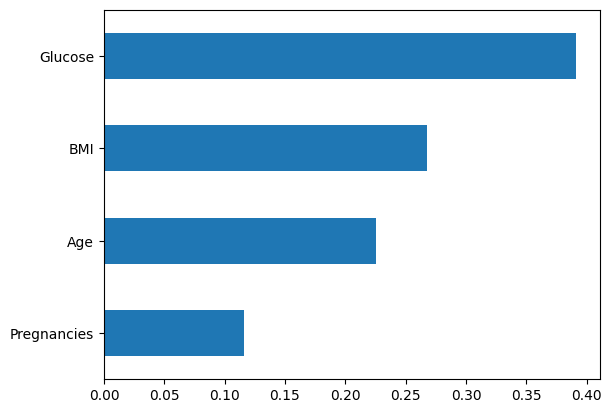

In [61]:
feature=pd.Series(model.feature_importances_, index=x.columns)
feature.sort_values().plot(kind='barh')
plt.show()

In [65]:
importances = pd.Series(model.feature_importances_, index=x.columns)
print(importances.sort_values(ascending=False))

Glucose        0.391466
BMI            0.267517
Age            0.225160
Pregnancies    0.115856
dtype: float64


In [ ]:
# for more accuracy use smote
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Split before SMOTE
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: Apply SMOTE on training data
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

In [ ]:
# for more use 